In [5]:
import pandas as pd
import numpy as np

In [6]:
df1 = pd.read_csv("/content/dataset.csv")


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
df1.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df1["ID"].dropna()


,ID
0,0
1,1
2,2
3,3
4,4
...,...
18363,18363
18364,18364
18365,18365
18366,18366


In [ ]:
df1["LastUpdatedDate"] = pd.to_datetime(df1["LastUpdatedDate"], errors='coerce').dt.date



In [ ]:
df1["LastUpdatedTime"] = pd.to_datetime(df1["LastUpdatedTime"], errors='coerce').dt.time


/tmp/ipython-input-7-1382260444.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["LastUpdatedTime"] = pd.to_datetime(df1["LastUpdatedTime"], errors='coerce').dt.time


In [ ]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ✅ Full Fix for Pathway Import Error

# Step 1: Remove conflicting files and caches
!rm -rf __pycache__/ pathway.py pathway.pyc io.py io.pyc

# Step 2: Reinstall Pathway (optional but ensures clean install)
!pip uninstall -y pathway -q
!pip install pathway -q


In [ ]:
# ✅ One-Cell Fix for Kaggle Pathway Import Error

import os

# Step 1: List files and detect naming conflicts
print("📁 Files in current working directory:\n")
conflicts = ["pathway.py", "io.py", "pathway.ipynb", "io.ipynb"]
has_conflict = False
for f in os.listdir():
    print("-", f)
    if f in conflicts:
        print(f"❌ Conflict detected: {f}")
        has_conflict = True

# Step 2: Remove cache and potentially conflicting files
!rm -rf __pycache__ pathway.py pathway.pyc io.py io.pyc

# Step 3: Clean reinstall of pathway
!pip uninstall -y pathway -q
!pip install pathway -q

# Step 4: Instruction
print("\n🛠️  Cleanup and reinstall complete.")

if has_conflict:
    print("⚠️  Rename/delete the conflicting files shown above before importing.")
else:
    print("✅ No conflicts found. Proceed to import.")

print("\n👉 Now run this in a NEW CELL:")
print("import pathway as pw\nprint('✅ Pathway is working!')")


📁 Files in current working directory:

- .config
- dataset.csv
- sample_data

🛠️  Cleanup and reinstall complete.
✅ No conflicts found. Proceed to import.

👉 Now run this in a NEW CELL:
import pathway as pw
print('✅ Pathway is working!')


In [ ]:

import bokeh.plotting
import panel as pn

In [ ]:
df1['Timestamp'] = pd.to_datetime(
    df1['LastUpdatedDate'].astype(str) + ' ' + df1['LastUpdatedTime'].astype(str),
    format='%Y-%m-%d %H:%M:%S',  # adjust if needed
    errors='coerce'
)


In [ ]:
print(df1[['LastUpdatedDate', 'LastUpdatedTime']].head())
print(type(df1['LastUpdatedDate'].iloc[0]))
print(type(df1['LastUpdatedTime'].iloc[0]))


  LastUpdatedDate LastUpdatedTime
0      2016-04-10        07:59:00
1      2016-04-10        08:25:00
2      2016-04-10        08:59:00
3      2016-04-10        09:32:00
4      2016-04-10        09:59:00
<class 'datetime.date'>
<class 'datetime.time'>


In [ ]:
df1.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-04-10,07:59:00,2016-04-10 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,2016-04-10,08:25:00,2016-04-10 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,2016-04-10,08:59:00,2016-04-10 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,2016-04-10,09:32:00,2016-04-10 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,2016-04-10,09:59:00,2016-04-10 09:59:00


In [ ]:
df1[["Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream.csv", index=False)

In [ ]:
# ✅ ONE-CELL FINAL FIX FOR PATHWAY IMPORT ERRORS

import os

print("📁 Checking for conflicting files in working directory:\n")
conflicts = ["pathway.py", "io.py", "pathway.ipynb", "io.ipynb"]
has_conflict = False
for f in os.listdir():
    print("-", f)
    if f in conflicts or f.startswith("pathway") or f.startswith("io"):
        print(f"❌ Conflict Detected: {f}")
        has_conflict = True

# Clean up
!rm -rf __pycache__ pathway.py pathway.pyc io.py io.pyc

# Reinstall pathway
!pip uninstall -y pathway -q
!pip install pathway -q

# Final instructions
print("\n🔁 NOW do the following:")
print("1. ✅ Rename your notebook to something like: `main_model.ipynb`")
print("2. 🔁 RESTART the runtime (Kaggle: Runtime > Restart; Colab: Runtime > Restart runtime)")
print("3. ▶️ Run this in a fresh new cell:\n\nimport pathway as pw\nprint('✅ Pathway is working!')")


📁 Checking for conflicting files in working directory:

- .config
- parking_stream.csv
- dataset.csv
- sample_data

🔁 NOW do the following:
1. ✅ Rename your notebook to something like: `main_model.ipynb`
2. 🔁 RESTART the runtime (Kaggle: Runtime > Restart; Colab: Runtime > Restart runtime)
3. ▶️ Run this in a fresh new cell:

import pathway as pw
print('✅ Pathway is working!')


In [11]:
!pip install pathway -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import pathway  as pw

In [36]:

class ParkingSchema(pw.Schema):
    Timestamp: str                   # e.g., "2016-08-10 16:04:00"
    SystemCodeNumber: str            # Unique parking system ID
    Occupancy: int                   # Number of currently occupied spots
    Capacity: int                    # Total parking capacity
    QueueLength: int                 # Number of vehicles in queue
    TrafficConditionNearby: str      # 'low', 'medium', or 'high'
    IsSpecialDay: int                # 1 for holiday/event, 0 otherwise
    VehicleType: str                 # 'car', 'bike', 'truck', etc.
pw.io.csv.read("cleaned_parking_stream.csv", schema=ParkingSchema, mode="streaming", autocommit_duration_ms=500)


<pathway.Table schema={'Timestamp': <class 'str'>, 'SystemCodeNumber': <class 'str'>, 'Occupancy': <class 'int'>, 'Capacity': <class 'int'>, 'QueueLength': <class 'int'>, 'TrafficConditionNearby': <class 'str'>, 'IsSpecialDay': <class 'int'>, 'VehicleType': <class 'str'>}>

In [32]:
# Sort data to simulate real-time
# Check the columns of df1 before sorting
if 'Timestamp' not in df1.columns:
    # Recreate the Timestamp column if it's missing
    df1['Timestamp'] = pd.to_datetime(
        df1['LastUpdatedDate'].astype(str) + ' ' + df1['LastUpdatedTime'].astype(str),
        format='%Y-%m-%d %H:%M:%S',  # adjust if needed
        errors='coerce'
    )

df1 = df1.sort_values(by=["SystemCodeNumber", "Timestamp"])

# Set constants
BASE_PRICE = 10.0
ALPHA = 0.5

# Initialize pricing list
prices = []

# Track last seen price per parking lot
lot_prices = {}

# Simulate price updates
for _, row in df1.iterrows():
    lot = row['SystemCodeNumber']
    occupancy = row['Occupancy']
    capacity = row['Capacity']

    prev_price = lot_prices.get(lot, BASE_PRICE)

    # Linear price update
    price = prev_price + ALPHA * (occupancy / capacity)

    # Optional: bound the price (min $5, max $20)
    price = max(5, min(price, 20))

    prices.append(price)
    lot_prices[lot] = price  # update last price

# Add to DataFrame
df1['LinearPrice'] = prices

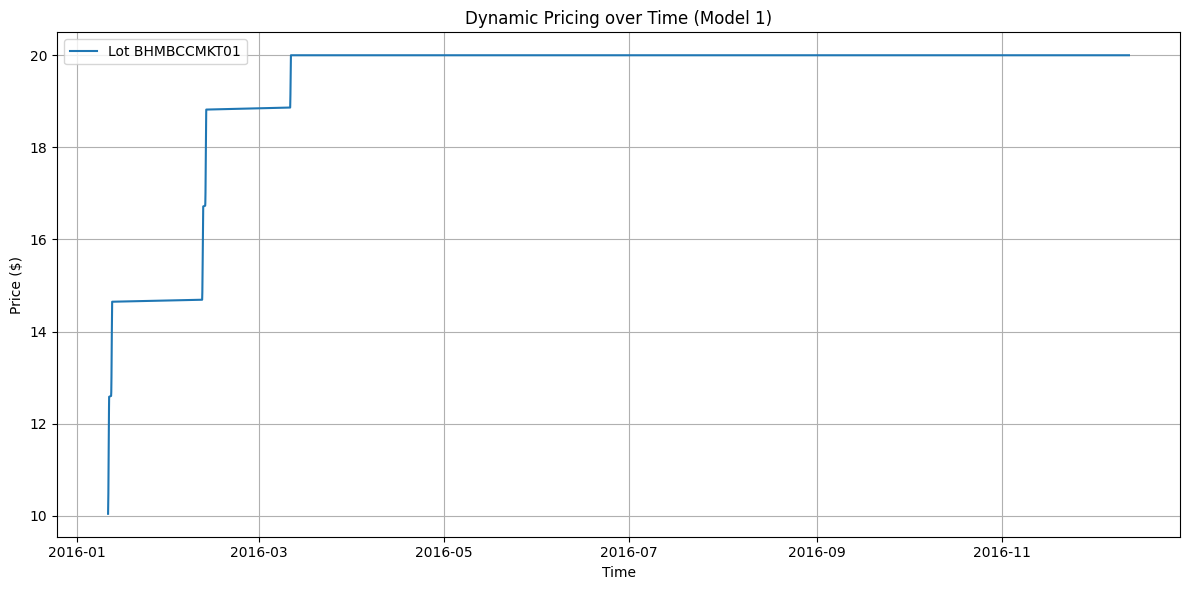

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Example: plot for one parking space
lot_id = 'BHMBCCMKT01'
df_lot = df1[df1['SystemCodeNumber'] == lot_id]

plt.plot(df_lot['Timestamp'], df_lot['LinearPrice'], label=f'Lot {lot_id}')
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title("Dynamic Pricing over Time (Model 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


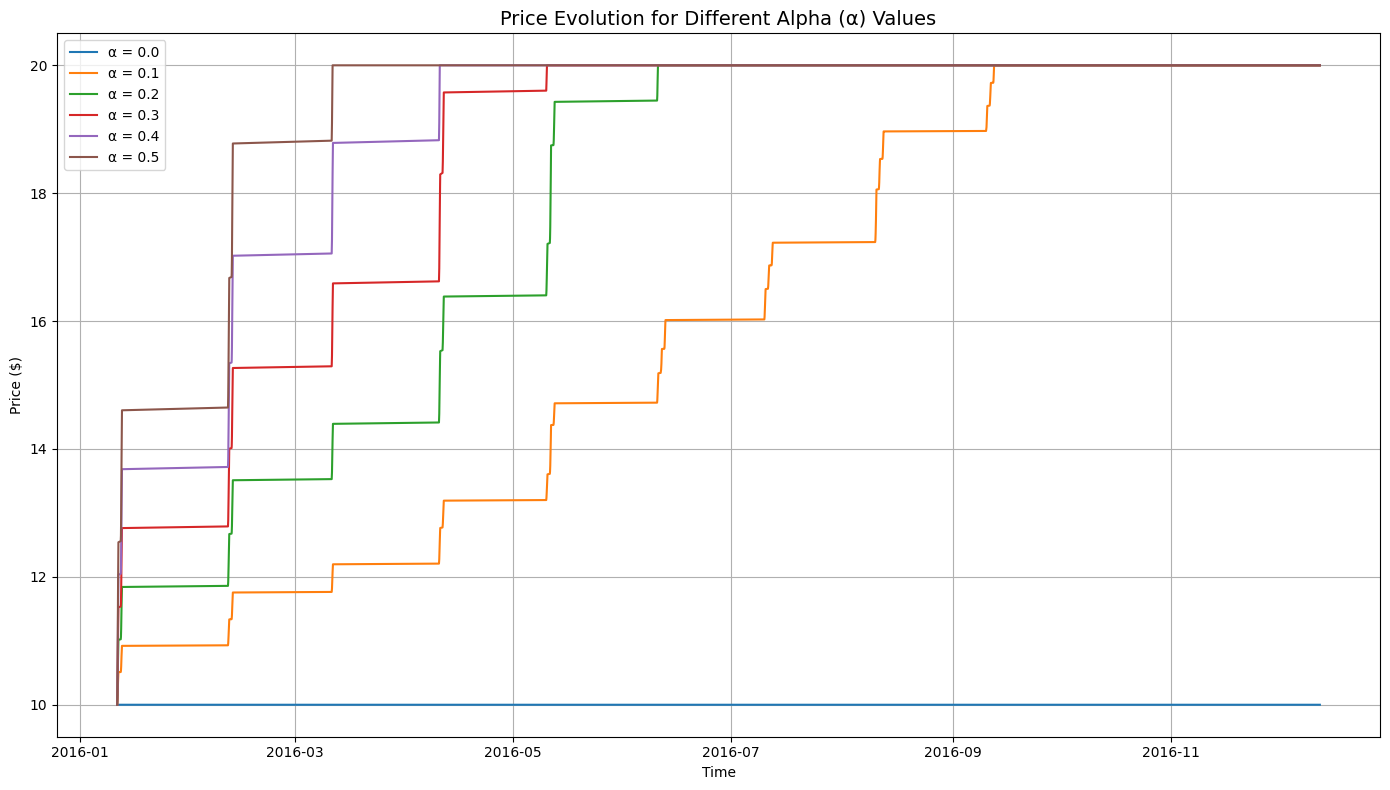

In [ ]:


# Use your pre-processed df1 with a 'Timestamp', 'Occupancy', and 'Capacity' column
df_lot = df1[df1['SystemCodeNumber'] == 'BHMBCCMKT01'].sort_values('Timestamp')

# Parameters
base_price = 10
alpha_values = np.arange(0.0, 0.55, 0.1)

plt.figure(figsize=(14, 8))

for alpha in alpha_values:
    price = [base_price]
    for i in range(1, len(df_lot)):
        occ = df_lot.iloc[i]['Occupancy']
        cap = df_lot.iloc[i]['Capacity']
        new_price = price[-1] + alpha * (occ / cap)
        new_price = min(new_price, 20)  # Cap at $20
        price.append(new_price)

    plt.plot(df_lot['Timestamp'], price, label=f'α = {alpha:.1f}')

# Plot styling
plt.title("Price Evolution for Different Alpha (α) Values", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


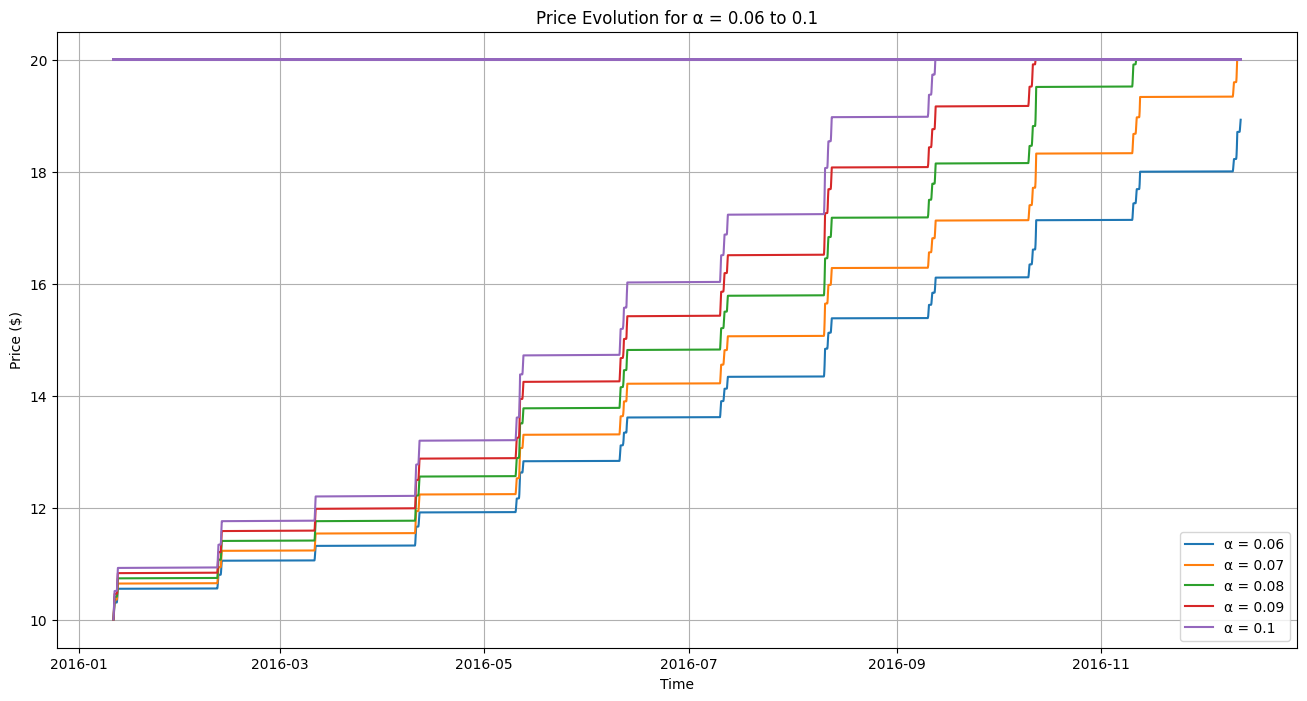

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
alphas = [0.06, 0.07, 0.08, 0.09, 0.1]

for alpha in alphas:
    prices = []
    price = 10
    for occ, cap in zip(df1['Occupancy'], df1['Capacity']):
        price = min(price + alpha * (occ / cap), 20)
        prices.append(price)
    plt.plot(df1['Timestamp'], prices, label=f'α = {alpha}')

plt.title("Price Evolution for α = 0.06 to 0.1")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()



In [31]:


# Assuming df1 already loaded and 'Timestamp' column is created
df2 = df1.copy()

# Define weights
alpha = 1.0
beta = 0.5
gamma = 0.7
delta = 1.0
lambda_ = 0.5
base_price = 10

# Vehicle type weights
vehicle_weights = {
    'car': 0.3,
    'bike': 0.1,
    'truck': 0.5
}

# Map vehicle weights
df2['VehicleWeight'] = df2['VehicleType'].map(vehicle_weights)


# Map traffic levels to numeric values
traffic_mapping = {
    'low': 0,
    'medium': 0.5,
    'high': 1
}
df2['TrafficScore'] = df2['TrafficConditionNearby'].map(traffic_mapping)

# Avoid division by zero
df2['OccupancyRate'] = df2['Occupancy'] / df2['Capacity'].replace(0, np.nan)

# Calculate raw demand
df2['RawDemand'] = (
    alpha * df2['OccupancyRate'] +
    beta * df2['QueueLength'] -
    gamma * df2['TrafficScore'] +
    delta * df2['IsSpecialDay'] +
    df2['VehicleWeight']
)

# Normalize demand between 0 and 1
min_demand = df2['RawDemand'].min()
max_demand = df2['RawDemand'].max()
df2['NormalizedDemand'] = (df2['RawDemand'] - min_demand) / (max_demand - min_demand + 1e-6)

# Final price bounded between 0.5x to 2x base price
df2['DynamicPrice'] = base_price * (1 + lambda_ * df2['NormalizedDemand'])
df2['DynamicPrice'] = df2['DynamicPrice'].clip(lower=base_price * 0.5, upper=base_price * 2)

# Show sample
df2[['Timestamp', 'Occupancy', 'Capacity', 'DynamicPrice']].head()

,Timestamp,Occupancy,Capacity,DynamicPrice
0,NaT,61,577,10.443439
1,NaT,64,577,10.446370
2,NaT,80,577,10.743852
3,NaT,107,577,10.770229
4,NaT,150,577,10.699498


In [26]:
import pathway as pw

class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: str
    IsSpecialDay: int
    VehicleType: str



In [40]:
import pandas as pd

# Read without header since raw stream likely has none
df_raw = pd.read_csv("cleaned_parking_stream.csv", header=None)

# Keep only rows with exactly 8 columns
df_clean = df_raw[df_raw.shape[1] == 8]

# Save cleaned file with proper header
df_clean.columns = [
    "Timestamp", "SystemCodeNumber", "Occupancy", "Capacity",
    "QueueLength", "TrafficConditionNearby", "IsSpecialDay", "VehicleType"
]
df_clean.to_csv("cleaned_parking_stream.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_parking_stream.csv'

In [39]:
import pandas as pd

# Filter rows with exactly 8 columns
df_raw = pd.read_csv("parking_stream.csv", header=None)
df_clean = df_raw[df_raw.shape[1] == 8]
df_clean.to_csv("cleaned_parking_stream.csv", index=False, header=False)


FileNotFoundError: [Errno 2] No such file or directory: 'parking_stream.csv'

In [59]:
import pathway as pw

# Step 1: Define schema
class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: str
    IsSpecialDay: int
    VehicleType: str

# Step 2: Load CSV in static mode
table = pw.io.csv.read(
    "cleaned_parking_stream.csv",
    schema=ParkingSchema,
    mode="static",
)

# Step 3: Pricing logic
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, special_day, vehicle_type):
    base_price = 10.0
    alpha, beta, gamma, delta, epsilon = 1.0, 0.5, 0.3, 1.0, 0.2
    vehicle_weights = {'car': 1, 'bike': 0.5, 'truck': 1.5}
    vehicle_weight = vehicle_weights.get(str(vehicle_type).lower(), 1.0)
    traffic_level = {'low': 0, 'medium': 1, 'high': 2}.get(str(traffic).lower(), 1)
    demand = (
        alpha * (occupancy / capacity)
        + beta * queue
        - gamma * traffic_level
        + delta * special_day
        + epsilon * vehicle_weight
    )
    demand = max(0, min(demand, 2))
    price = round(base_price * (1 + 0.2 * demand), 2)
    return min(20.0, max(5.0, price))

# Step 4: Apply pricing
result = table.select(
    Timestamp=table.Timestamp,
    SystemCodeNumber=table.SystemCodeNumber,
    Price=dynamic_price(
        table.Occupancy,
        table.Capacity,
        table.QueueLength,
        table.TrafficConditionNearby,
        table.IsSpecialDay,
        table.VehicleType
    )
)

# Step 5: Write result to CSV
pw.io.csv.write(result, "realtime_prices.csv")

# ✅ MUST call this
pw.run()




Output()

KeyboardInterrupt: 

In [64]:
import pathway as pw
import threading
import time

# Step 1: Define schema
class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: str
    IsSpecialDay: int
    VehicleType: str

# Step 2: Load static file
table = pw.io.csv.read(
    "cleaned_parking_stream.csv",
    schema=ParkingSchema,
    mode="static"
)

# Step 3: Pricing UDF
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, special_day, vehicle_type):
    base_price = 10.0
    alpha, beta, gamma, delta, epsilon = 1.0, 0.5, 0.3, 1.0, 0.2
    vehicle_weights = {'car': 1, 'bike': 0.5, 'truck': 1.5}
    vehicle_weight = vehicle_weights.get(str(vehicle_type).lower(), 1.0)
    traffic_level = {'low': 0, 'medium': 1, 'high': 2}.get(str(traffic).lower(), 1)
    demand = (
        alpha * (occupancy / capacity)
        + beta * queue
        - gamma * traffic_level
        + delta * special_day
        + epsilon * vehicle_weight
    )
    demand = max(0, min(demand, 2))
    price = round(base_price * (1 + 0.2 * demand), 2)
    return min(20.0, max(5.0, price))

# Step 4: Build result table
result = table.select(
    Timestamp=table.Timestamp,
    SystemCodeNumber=table.SystemCodeNumber,
    Price=dynamic_price(
        table.Occupancy,
        table.Capacity,
        table.QueueLength,
        table.TrafficConditionNearby,
        table.IsSpecialDay,
        table.VehicleType
    )
)

# Step 5: Write output
pw.io.csv.write(result, "realtime_prices.csv")

# Step 6: Run pipeline in a thread
def run_pipeline():
    pw.run()

thread = threading.Thread(target=run_pipeline)
thread.start()

# Let it run for a few seconds
thread.join(timeout=10)

# Extra delay to ensure file write is flushed
time.sleep(2)

if thread.is_alive():
    print("Pipeline still running. Proceeding anyway.")
else:
    print("Pipeline completed.")



Traceback (most recent call last):

File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner

self.run()

File "/usr/lib/python3.11/threading.py", line 982, in run

self._target(*self._args, **self._kwargs)

File "/tmp/ipython-input-64-2877564603.py", line 61, in run_pipeline

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/runtime_type_check.py", line 19, in 
with_type_validation

return beartype.beartype(f)(*args, **kwargs)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

File "<@beartype(pathway.internals.run.run) at 0x7f19350c1440>", line 143, in run

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/run.py", line 55, in run

).run_outputs()

^^^^^^^^^^^^^

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/graph_runner/__init__.py", line 119, in 
run_outputs

self.run_nodes(self._graph.global_scope.output_nodes, after_build=after_build)

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/graph_runner/__init__.py", line 95, in run_nodes

self._run(all_nodes, after_build=after_build)

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/graph_runner/__init__.py", line 190, in _run

with (

File "/usr/lib/python3.11/contextlib.py", line 137, in __enter__

return next(self.gen)

^^^^^^^^^^^^^^

File "/usr/local/lib/python3.11/dist-packages/pathway/internals/monitoring.py", line 227, in monitor_stats

with Live(

File "/usr/local/lib/python3.11/dist-packages/rich/live.py", line 166, in __enter__

self.start(refresh=self._renderable is not None)

File "/usr/local/lib/python3.11/dist-packages/rich/live.py", line 113, in start

self.console.set_live(self)

File "/usr/local/lib/python3.11/dist-packages/rich/console.py", line 835, in set_live

raise errors.LiveError("Only one live display may be active at once")

rich.errors.LiveError: Only one live display may be active at once

Pipeline completed.

In [ ]:
!pip install bokeh --quiet


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Read safely and check for content
df = pd.read_csv("realtime_prices.csv")

if df.empty:
    print("⚠️ CSV is still empty. Retry or check input file.")
else:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')

    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['Price'], color='blue', label='Dynamic Price')
    plt.xlabel("Timestamp")
    plt.ylabel("Price (₹)")
    plt.title("Dynamic Parking Price Over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



EmptyDataError: No columns to parse from file

In [73]:
import pathway as pw

# 1. Define schema
class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: str
    IsSpecialDay: int
    VehicleType: str

# 2. Load CSV in static mode
table = pw.io.csv.read(
    "cleaned_parking_stream.csv",
    schema=ParkingSchema,
    mode="static"
)

# 3. Define pricing logic
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, special_day, vehicle_type):
    base_price = 10.0
    alpha, beta, gamma, delta, epsilon = 1.0, 0.5, 0.3, 1.0, 0.2
    vehicle_weights = {'car': 1, 'bike': 0.5, 'truck': 1.5}
    vehicle_weight = vehicle_weights.get(str(vehicle_type).lower(), 1.0)
    traffic_level = {'low': 0, 'medium': 1, 'high': 2}.get(str(traffic).lower(), 1)
    demand = (
        alpha * (occupancy / capacity)
        + beta * queue
        - gamma * traffic_level
        + delta * special_day
        + epsilon * vehicle_weight
    )
    demand = max(0, min(demand, 2))
    price = round(base_price * (1 + 0.2 * demand), 2)
    return min(20.0, max(5.0, price))

# 4. Select result
result = table.select(
    Timestamp=table.Timestamp,
    SystemCodeNumber=table.SystemCodeNumber,
    Price=dynamic_price(
        table.Occupancy,
        table.Capacity,
        table.QueueLength,
        table.TrafficConditionNearby,
        table.IsSpecialDay,
        table.VehicleType
    )
)

# 5. Write output
pw.io.csv.write(result, "realtime_prices.csv")

# 6. Run the pipeline



In [75]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("realtime_prices.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Focus on a single lot
lot_id = df['SystemCodeNumber'].unique()[0]
lot_df = df[df['SystemCodeNumber'] == lot_id]

# Sort by time
lot_df = lot_df.sort_values('Timestamp')

plt.figure(figsize=(14, 5))
plt.plot(lot_df['Timestamp'], lot_df['Price'], color='navy', linewidth=2, label=f"Lot: {lot_id}")
plt.scatter(lot_df['Timestamp'], lot_df['Price'], color='skyblue', s=20)

plt.title(f"📈 Price Trend for Lot: {lot_id}")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


EmptyDataError: No columns to parse from file

In [79]:
# Install Pathway if not already installed
!pip install -q pathway

# Imports
import pandas as pd
import pathway as pw
import matplotlib.pyplot as plt

# 🧼 Load and check the input CSV (adjust path if needed)
df = pd.read_csv("parking_stream.csv")
print(f"✅ Loaded input with {len(df)} rows")
df.to_csv("parking_stream.csv", index=False)  # rewrite to ensure format

# Step 1: Define schema
class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: str
    IsSpecialDay: int
    VehicleType: str

# Step 2: Load CSV
table = pw.io.csv.read(
    "parking_stream.csv",
    schema=ParkingSchema,
    mode="static"
)

# Step 3: Dynamic pricing logic
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, special_day, vehicle_type):
    base_price = 10.0
    alpha, beta, gamma, delta, epsilon = 1.0, 0.5, 0.3, 1.0, 0.2
    weights = {'car': 1, 'bike': 0.5, 'truck': 1.5}
    traffic_map = {'low': 0, 'medium': 1, 'high': 2}
    vw = weights.get(str(vehicle_type).lower(), 1.0)
    tl = traffic_map.get(str(traffic).lower(), 1)
    demand = max(0, min(2, alpha * (occupancy / capacity) + beta * queue - gamma * tl + delta * special_day + epsilon * vw))
    return round(min(20.0, max(5.0, base_price * (1 + 0.2 * demand))), 2)

# Step 4: Apply pricing
result = table.select(
    Timestamp=table.Timestamp,
    SystemCodeNumber=table.SystemCodeNumber,
    Price=dynamic_price(
        table.Occupancy,
        table.Capacity,
        table.QueueLength,
        table.TrafficConditionNearby,
        table.IsSpecialDay,
        table.VehicleType
    )
)

# Step 5: Output result
pw.io.csv.write(result, "realtime_prices.csv")

# Step 6: Run Pathway
pw.run()

# Step 7: Plot result
df_out = pd.read_csv("realtime_prices.csv")
if df_out.empty:
    print("⚠️ realtime_prices.csv is empty.")
else:
    df_out['Timestamp'] = pd.to_datetime(df_out['Timestamp'])
    df_out = df_out.sort_values('Timestamp')
    plt.figure(figsize=(12, 6))
    plt.plot(df_out['Timestamp'], df_out['Price'], label="Dynamic Price", color='blue')
    plt.xlabel("Timestamp")
    plt.ylabel("Price (₹)")
    plt.title("Model 2: Dynamic Parking Price Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'parking_stream.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# ✅ Auto Plot Refresh Loop
def realtime_plot(csv_file="realtime_prices.csv", iterations=60, delay=1):
    for _ in range(iterations):
        try:
            # Load the CSV
            df = pd.read_csv(csv_file)
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])

            # Clear and plot
            clear_output(wait=True)
            plt.figure(figsize=(12, 5))
            for name, group in df.groupby('SystemCodeNumber'):
                plt.plot(group['Timestamp'], group['Price'], label=name)

            plt.xlabel('Time')
            plt.ylabel('Price ($)')
            plt.title('Real-Time Price Updates')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print("Waiting for data or still streaming...", e)

        time.sleep(delay)

# ▶️ Call the function
realtime_plot("realtime_prices.csv", iterations=10, delay=1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Sample: df with Timestamp and Price
df = pd.read_csv("realtime_prices.csv", parse_dates=['Timestamp'])
lot_id = 'Shopping'
lot_df = df[df['SystemCodeNumber'] == lot_id].sort_values('Timestamp')

# Prepare plot
fig, ax = plt.subplots(figsize=(12, 5))
x_data, y_data = [], []
line, = ax.plot_date([], [], '-', label=f"Lot: {lot_id}")
ax.set_title(f"Real-Time Price Animation for Lot: {lot_id}")
ax.set_xlabel("Time")
ax.set_ylabel("Price ($)")
ax.legend()
plt.xticks(rotation=45)
ax.set_xlim(lot_df['Timestamp'].min(), lot_df['Timestamp'].max())
ax.set_ylim(lot_df['Price'].min() - 1, lot_df['Price'].max() + 1)
plt.tight_layout()

# Animation update
def update(frame):
    x_data.append(lot_df['Timestamp'].iloc[frame])
    y_data.append(lot_df['Price'].iloc[frame])
    line.set_data(x_data, y_data)
    return line,

# Animate
ani = FuncAnimation(fig, update, frames=len(lot_df), interval=200, blit=True)

# Show animation in Colab
HTML(ani.to_jshtml())


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
import pandas as pd
import time

output_notebook()

# 🔁 Function to simulate real-time plotting from file
def plot_realtime_bokeh(csv_file="realtime_prices.csv", max_steps=50, delay=1.0):
    source = ColumnDataSource(data=dict(x=[], y=[]))

    p = figure(x_axis_type='datetime', width=800, height=400, title="Real-Time Parking Price Updates")
    p.line('x', 'y', source=source, line_width=2, color='green')

    handle = show(p, notebook_handle=True)

    for _ in range(max_steps):
        try:
            df = pd.read_csv(csv_file)

            df['Timestamp'] = pd.to_datetime(df['Timestamp'])

            # Optional: filter for one parking lot
            latest = df[df['SystemCodeNumber'] == df['SystemCodeNumber'].unique()[0]]

            # Update data source
            source.data = {
                'x': latest['Timestamp'],
                'y': latest['Price']
            }

            show(p, notebook_handle=True, update=True)
        except Exception as e:
            print("Waiting for data or error:", e)

        time.sleep(delay)

# ▶️ Run this after pw.run() has started
plot_realtime_bokeh("realtime_prices.csv", max_steps=5, delay=1.0)


In [ ]:
import pathway as pw

# Step 1: Define the schema (keep as before)
# Assume ParkingSchema already defined

# Step 2: Load the CSV stream
table = pw.io.csv.read(
    "parking_stream.csv",
    schema=ParkingSchema,
    mode="streaming",
    autocommit_duration_ms=500
)

# Step 3: Define tuned dynamic pricing logic
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, special_day, vehicle_type):
    base_price = 10.0
    max_price = base_price * 2     # upper bound = $20
    min_price = base_price * 0.5   # lower bound = $5

    # Adjusted weights to balance features
    alpha = 0.5    # occupancy
    beta = 0.3     # queue length
    gamma = 0.4    # traffic
    delta = 0.8    # special day
    epsilon = 0.3  # vehicle type

    vehicle_weights = {'car': 1.0, 'bike': 0.7, 'truck': 1.4}
    traffic_levels = {'low': 0.0, 'medium': 0.5, 'high': 1.0}

    vehicle_weight = vehicle_weights.get(vehicle_type.lower(), 1.0)
    traffic_score = traffic_levels.get(traffic.lower(), 0.5)

    try:
        occ_ratio = occupancy / capacity if capacity else 0
    except:
        occ_ratio = 0

    # Calculate demand (bounded between 0 and 1.5)
    demand = (
        alpha * occ_ratio +
        beta * queue -
        gamma * traffic_score +
        delta * special_day +
        epsilon * vehicle_weight
    )
    demand = max(0.0, min(demand, 1.5))  # normalized demand ∈ [0, 1.5]

    # Pricing logic: λ = 0.4 (adjusts price sensitivity)
    price = base_price * (1 + 0.4 * demand)
    price = min(max(price, min_price), max_price)  # enforce smoothness
    return round(price, 2)

# Step 4: Apply logic to table
result = table.select(
    Timestamp=table.Timestamp,
    SystemCodeNumber=table.SystemCodeNumber,
    Price=dynamic_price(
        table.Occupancy,
        table.Capacity,
        table.QueueLength,
        table.TrafficConditionNearby,
        table.IsSpecialDay,
        table.VehicleType
    )
)

# Step 5: Save result
pw.io.csv.write(result, "realtime_prices.csv")


In [ ]:
# Before plotimport pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Load the data
df = pd.read_csv("realtime_prices.csv", parse_dates=["Timestamp"])

# Step 2: Get all unique lots
unique_lots = df['SystemCodeNumber'].unique()

# Step 3: Choose color palette
colors = plt.cm.get_cmap("tab20", len(unique_lots))

# Step 4: Plot
plt.figure(figsize=(14, 6))

for i, lot in enumerate(unique_lots):
    lot_df = df[df['SystemCodeNumber'] == lot]
    plt.plot(
        lot_df['Timestamp'],
        lot_df['Price'],
        label=f"Lot: {lot}",
        color=colors(i)
    )

# Step 5: Plot styling
plt.title("🅿️ Real-Time Price Trends by Lot")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()


In [ ]:
# Re-import required libraries after code execution environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Load
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step B1: Plot top 5 lots with most price variation
lot_variance = df.groupby("SystemCodeNumber")["Price"].std().sort_values(ascending=False)
top_lots = lot_variance.head(5).index.tolist()

plt.figure(figsize=(14, 6))
for lot in top_lots:
    lot_df = df[df["SystemCodeNumber"] == lot]
    plt.plot(lot_df["Timestamp"], lot_df["Price"], label=f"Lot: {lot}")

plt.title(" Top 5 Lots with Highest Price Volatility")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
